# Exercise: Training a fully-connected deep learning model for CIFAR10

1. Prepare environment
1. Prepare dataset
1. Create a model
  * You are restricted to use only fully-connected (i.e., `nn.Linear`) layers in the model.
1. Specify loss
1. Specify optimizer
1. Develop a training loop
1. Develop a prediction code
1. Training a model
  1. For each batch of the trainign set
    1. Make predictions
    1. Compute loss
    1. Backpropagation
  1. At the end of each epoch
    1. Evaluate on the validation set
    1. Save model weight if achive the best performance on the validation set
1. Plot a learning curve (underfitting vs overfitting)
  * Please justify and provide supporting evidences (e.g., graph) whether your model is "underfitting", "overfitting" or "just right".
1. Evaluate on the test set

**Note**
* Please use the CIFAR10 data from here ([link](https://pytorch.org/vision/main/generated/torchvision.datasets.CIFAR10.html))
* You can reuse most of the code from the training a simple deep learning model in Pytorch notebook.

# **Prepare environment**

In [ ]:
import numpy as np
import torch
import torchvision.transforms as T
import torch.nn.functional as F
from torch import nn
from torch.utils.data import DataLoader, Subset
from torchvision import datasets

# Stratified split
from sklearn.model_selection import train_test_split

# PyTorch TensorBoard support
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
font = {'size' : 18}
matplotlib.rc('font', **font)

: 

# Prepare dataset

In [ ]:
# Download training data from open datasets.
train_ds = datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=T.ToTensor(),
)

# Download test data from open datasets.
test_ds = datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=T.ToTensor(),
)

# Preparing for validaion test
train_indices, valid_indices, _, _ = train_test_split(
    range(len(train_ds)),
    train_ds.targets,
    test_size=10000
)
valid_ds = Subset(train_ds, valid_indices)
train_ds = Subset(train_ds, train_indices)

# Create data loaders
batch_size = 64
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
valid_dl = DataLoader(valid_ds, batch_size=batch_size, shuffle=False)
test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

# Class mapping
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]



: 

In [ ]:
# Report split sizes
print(f'Training set: {len(train_ds)} examples')
print(f'Validation set: {len(valid_ds)} examples')
print(f'Test set: {len(test_ds)} examples')

# Get one batch of data
for batch in train_dl:
    imgs, lbls = batch
    break

print(imgs.shape)
print(lbls.shape)

: 

In [ ]:
figure = plt.figure(figsize=(7, 7))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(imgs), size=(1,)).item()
    img, label = imgs[sample_idx], lbls[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(classes[label])
    plt.axis("off")
    plt.imshow(img.numpy().transpose(1,2,0))
plt.show()

: 

# Create a Model

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32*3, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

: 

# Specify Loss

In [ ]:
# Specify loss
# Note: Make sure to check the following when choosing the loss
#   1. the label format of each loss (one-hot, ordinal, etc.)
#   2. classification or regression
loss_fn = nn.CrossEntropyLoss()

: 

# Specify optimizer

In [7]:
# Specify optimizer
# e.g., SGD, Adam, RMSProp, etc.
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Develop a training loop

In [8]:
def train_one_epoch(dataloader, model, loss_fn, optimizer):
    # Size of the dataset
    size = len(dataloader.dataset)

    # Training mode
    model.train()

    # Keep track of the loss
    running_loss = 0.
    last_loss = 0.

    # We use enumerate to track the batch index
    for i, batch in enumerate(dataloader):
        X, y = batch
        X, y = X.to(device), y.to(device)

        # Prediction
        pred = model(X)

        # Compute loss
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()  # zeros the optimizer's gradient
        loss.backward()  # calculate the backward gradients
        optimizer.step()  # adjust model's weights based on the observed gradients

        # Keep track of the loss
        running_loss += loss.item()
        if (i+1) % 50 == 0:
            last_loss = running_loss / 50
            current = (i + 1) * len(X)
            print(f"loss: {last_loss:>7f}  [{current:>5d}/{size:>5d}]")
            running_loss = 0.

# Develop a prediction code

In [9]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    # Test mode
    model.eval()

    # Predict on test set
    loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            # Prediction
            pred = model(X)
            y_pred = pred.argmax(1)
            # Compute loss
            loss += loss_fn(pred, y).item()
            # Correct predictions
            correct += (y_pred == y).type(torch.float).sum().item()

    # Average loss
    loss /= num_batches

    # Accuracy
    accuracy = correct / size

    return loss, accuracy

# Training a model

In [10]:
##For each batch of the trainign set
####Make predictions
####Compute loss
####Backpropagation


##At the end of each epoch
####Evaluate on the validation set
####Save model weight if achive the best performance on the validation set

In [11]:
epochs = 15
best_vloss = 100000.
hist = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
}

for epoch in range(epochs):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_one_epoch(train_dl, model, loss_fn, optimizer)
    train_loss, train_acc = test(train_dl, model, loss_fn)
    val_loss, val_acc = test(valid_dl, model, loss_fn)

    # History for learning curve
    hist['train_loss'].append(train_loss)
    hist['train_acc'].append(train_acc)
    hist['val_loss'].append(val_loss)
    hist['val_acc'].append(val_acc)

    # Track best performance, and save the model's state
    if val_loss < best_vloss:
        best_vloss = val_loss
        torch.save(model.state_dict(), 'model_best_vloss.pth')
        print('Saved best model to model_best_vloss.pth')
print("Done!")

Epoch 1
-------------------------------
loss: 2.189295  [ 3200/40000]
loss: 2.022544  [ 6400/40000]
loss: 1.911562  [ 9600/40000]
loss: 1.896319  [12800/40000]
loss: 1.871569  [16000/40000]
loss: 1.890938  [19200/40000]
loss: 1.815062  [22400/40000]
loss: 1.840309  [25600/40000]
loss: 1.820010  [28800/40000]
loss: 1.786816  [32000/40000]
loss: 1.734925  [35200/40000]
loss: 1.756535  [38400/40000]
Saved best model to model_best_vloss.pth
Epoch 2
-------------------------------
loss: 1.727775  [ 3200/40000]
loss: 1.742074  [ 6400/40000]
loss: 1.683649  [ 9600/40000]
loss: 1.727178  [12800/40000]
loss: 1.653927  [16000/40000]
loss: 1.678023  [19200/40000]
loss: 1.691747  [22400/40000]
loss: 1.712941  [25600/40000]
loss: 1.713288  [28800/40000]
loss: 1.683091  [32000/40000]
loss: 1.647083  [35200/40000]
loss: 1.636172  [38400/40000]
Saved best model to model_best_vloss.pth
Epoch 3
-------------------------------
loss: 1.615548  [ 3200/40000]
loss: 1.619326  [ 6400/40000]
loss: 1.647010  [ 

# Plot a learning curve (underfitting vs overfitting)

In [12]:
##Please justify and provide supporting evidences (e.g., graph) 
##whether your model is "underfitting", "overfitting" or "just right".

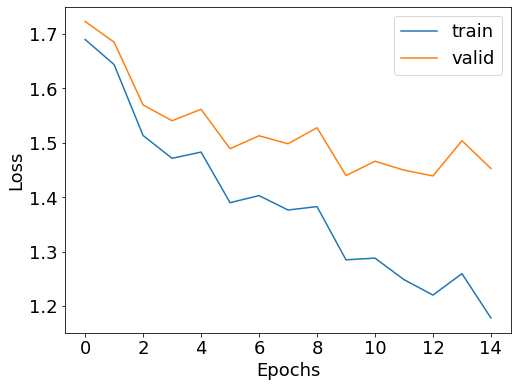

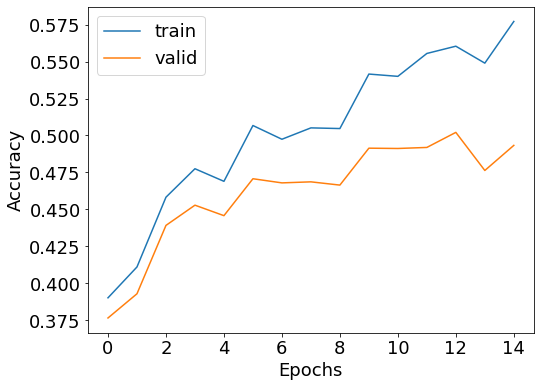

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(hist['train_loss'], label='train')
ax.plot(hist['val_loss'], label='valid')
ax.set_ylabel('Loss')
ax.set_xlabel('Epochs')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(hist['train_acc'], label='train')
ax.plot(hist['val_acc'], label='valid')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epochs')
plt.legend()
plt.show()

plt.close('all')

In [14]:
model_best = NeuralNetwork().to(device)
model_best.load_state_dict(torch.load("model_best_vloss.pth"))

<All keys matched successfully>

# Evaluate on the test set

In [15]:
model_best.eval()

# Get one batch of data
for batch in test_dl:
    imgs, lbls = batch
    break

X, y = imgs[0:1].to(device), lbls[0:1].to(device)
with torch.no_grad():
    pred = model_best(X)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "cat", Actual: "cat"


In [16]:
# Use the best model on the validation set
test_loss, test_acc = test(test_dl, model_best, loss_fn)
print(f"Test: loss={test_loss:>8f}, acc={(100*test_acc):>0.1f}%")

Test: loss=1.429985, acc=49.9%


In [17]:
# Use the latest model
# Note: the latest model might be different from the best on validation set
test_loss, test_acc = test(test_dl, model, loss_fn)
print(f"Test: loss={test_loss:>8f}, acc={(100*test_acc):>0.1f}%")

Test: loss=1.432837, acc=49.7%
